In [2]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
phase2_collection = unpickle_this('phase2collection.pkl')

pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 100,
                                                  ignore_freq =  0.5,
                                                  smoothing_window = 500)

All set to analyze


All set to analyze


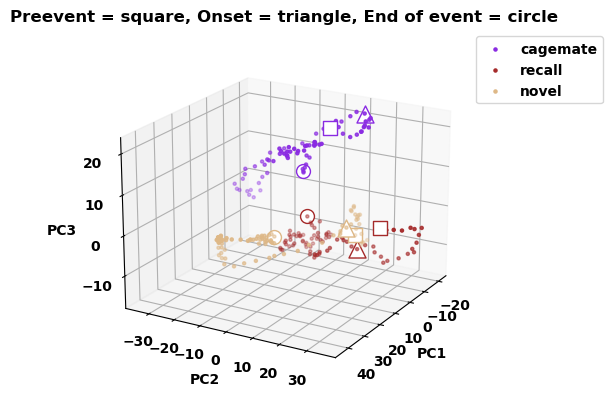

0.3208194610991394
0.5168498042331792
0.6127893828869908
0.685861374563919
0.733157902826978
0.7744039720083314
0.8107890958797199
0.8389799341250024
0.8587920389555271
0.8776020131907427
0.8915090078823186
0.9033054999748219


In [4]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 50,
                                                  ignore_freq =  0.5,
                                                  smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(3, 1, events = ['cagemate', 'recall', 'novel'], d = 3)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
var = pc_dict['explained variance']
total_var = 0
for varl in var[0:12]: 
    total_var =+ total_var + varl
    print(total_var)

All set to analyze


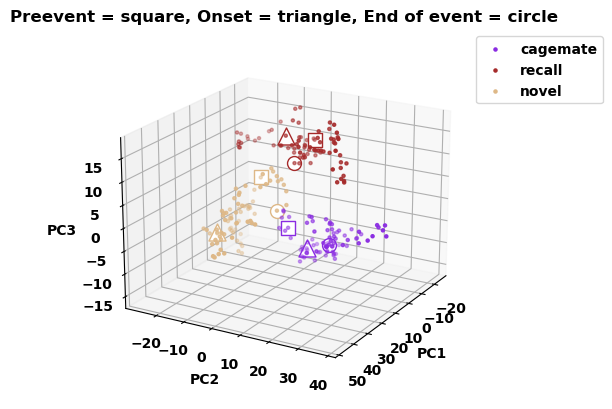

0.2665080057850898
0.44202034817007674
0.5210554000078303
0.5930229679611025
0.6463626513453934
0.6852256815764727
0.7221405616790723
0.7475301821997996
0.7708897972831571
0.7909665869242911
0.8093810836375294
0.8244368371401964
0.838588724204257
0.8518229151955535
0.8635697194628468
0.8740027599303742
0.882872355291
0.8908863805636057
0.8986021568447716
0.9059566335720511


In [5]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 100,
                                                  ignore_freq =  0.5,
                                                  smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(5, 3, events = ['cagemate', 'recall', 'novel'], d = 3)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
var = pc_dict['explained variance']

total_var = 0
for varl in var[0:20]: 
    total_var =+ total_var + varl
    print(total_var)


All set to analyze


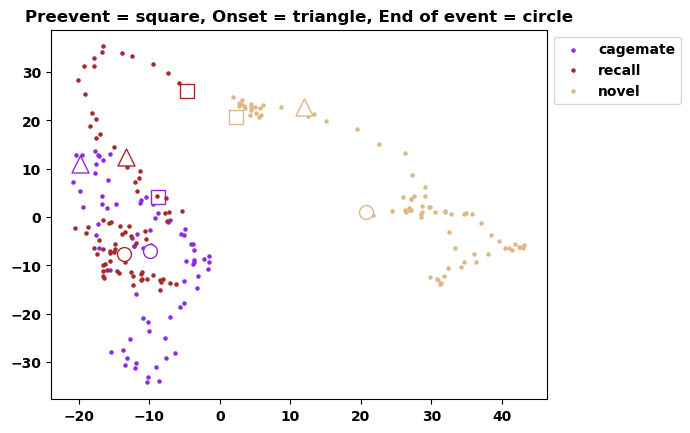

0.3208194610991394
0.5168498042331792
0.6127893828869908
0.685861374563919
0.733157902826978
0.7744039720083314
0.8107890958797199
0.8389799341250024
0.8587920389555271
0.8776020131907427
0.8915090078823186
0.9033054999748219


In [6]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 50,
                                                  ignore_freq =  0.5,
                                                  smoothing_window = 500)
pca_dict = pca_analysis.PCA_trajectories(3, 1, events = ['cagemate', 'recall', 'novel'], azim = 0, elev = 40)
#eo_dis = pca_analysis.LOO_PCA(2, 2, 0.9, events = ['acquisition', 'recall', 'cagemate', 'novel'])
#var[0:3]
total_var = 0
var = pca_dict['explained variance']
for varl in var[0:12]: 
    total_var =+ total_var + varl
    print(total_var)

# Plotting

All set to analyze
[0.26650801 0.17551234 0.07903505]


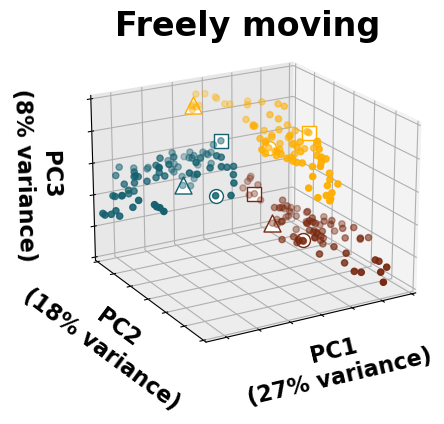

In [7]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection,
                                                  timebin = 100,
                                                  ignore_freq = 0.5, 
                                                  smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(equalize = 5,pre_window= 3, d = 3, events = ['cagemate', 'recall', 'novel'], plot = False)
equalize = 3

pre_window = 1
post_window = 0
PCA_matrix = pc_dict['transformed data']
timebin = 50
PCA_key = pc_dict['labels']
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                  'long-term familiar': hex_2_rgb('#792910')}
event_lengths = int(
        (equalize + pre_window + post_window) * 1000 / timebin
    )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F')]
col_counter = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(0, len(PCA_key), event_lengths):
    event_label = PCA_key[i]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=20,
        color=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    if post_window != 0:
        ax.scatter(
            PCA_matrix[post, 0],
            PCA_matrix[post, 1],
            PCA_matrix[post, 2],
            marker="D",
            s=100,
            c="w",
            edgecolors=colors[col_counter],
        )
    col_counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_xlim(-20, 45)
ax.set_ylim(-5, 25)
ax.set_zlim(-20, 30)
ax.view_init(azim = 60, elev =20)
ax.set_title("Freely moving", fontsize = 24, y = 1)
ax.set_xlabel("PC1\n(27% variance)", fontsize = 16)
ax.set_ylabel("PC2\n(18% variance)", fontsize = 16)
ax.set_zlabel("PC3\n(8% variance)", fontsize = 16)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.yaxis.pane.set_alpha(0.9)
ax.xaxis.pane.set_alpha(0.9)
ax.zaxis.pane.set_alpha(0.9)
print(pc_dict['explained variance'][0:3])
plt.savefig('pca_phase2.png', dpi = 600, transparent = True,bbox_inches='tight' )
plt.show()


# Geodesic Distances 

In [8]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, timebin = 100,ignore_freq = 0.5, smoothing_window = 500)
avg_geo_dis = pca_analysis.avg_geo_dist(5,3, 0.9,events = ['recall', 'cagemate', 'novel'] )
avg_geo_dis_df = pd.DataFrame.from_dict(avg_geo_dis)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_dis_df.columns.to_list()
avg_geo_dis_df.columns = ['cage vs novel', 'cage vs recall', 'nov vs recall']
avg_vals_df = avg_geo_dis_df.mean()
avg_vals_df



All set to analyze


cage vs novel      979.175493
cage vs recall    1061.278527
nov vs recall     1113.382239
dtype: float64

In [9]:
avg_vals = avg_vals_df.values.tolist()
avg_vals

[979.1754930526828, 1061.2785270294078, 1113.382239361511]

In [10]:
avg_sems = avg_geo_dis_df.sem()
avg_sems = avg_sems.values.tolist()


## Plotting

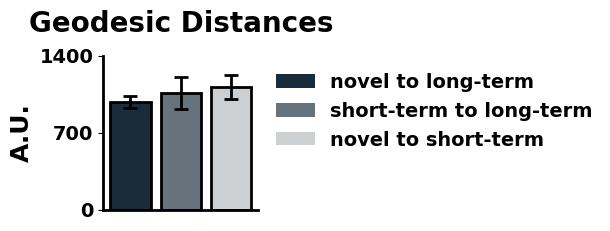

In [25]:
from matplotlib.patches import Patch
import matplotlib.ticker as ticker


color_id_dict = {'novel to long-term': hex_2_rgb('#1a2c3a'),  
                'short-term to long-term': hex_2_rgb('#66727c'),
                'novel to short-term': hex_2_rgb('#ccd0d3')
                }
hatches = ['','','']  
plt.figure(figsize= (2,2))           
plt.bar(color_id_dict.keys(), avg_vals, yerr = avg_sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,1400)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances', fontsize = 20, y =1.1)
plt.savefig('phase2_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

## Stats

In [12]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
p_values = []
for pair in combinations(avg_geo_dis_df.columns, 2):
    t_stat, p_value = ttest_rel(avg_geo_dis_df[pair[0]], avg_geo_dis_df[pair[1]])
    p_values.append(p_value)


adjusted_p_values = multipletests(p_values, method='holm')
adjusted_p_values

(array([False, False, False]),
 array([0.86829124, 0.44489014, 0.86829124]),
 0.016952427508441503,
 0.016666666666666666)

# Trajectory Length


In [13]:
from scipy.spatial.distance import euclidean
def trajectory_length(pca_matrix, key):
    trajectory_lengths = []
    event_order = []
    unique_values, counts = np.unique(key, return_counts=True)
    event_len = counts[0]
    for j in range(0, len(key), event_len):
        trajectory_length = 0
        for i in range(event_len-1):
            trajectory_length = trajectory_length + euclidean(
                pca_matrix[j+i, :],
                pca_matrix[j+i+1, :])
        trajectory_lengths.append(trajectory_length)
        event_order.append(key[j])
    return [trajectory_lengths, event_order]

trajectory_lengths = []
orders= []
for recording in phase2_collection.collection.keys():
    pc_dict = pca_analysis.PCA_matrix_generation(5, 3,
                                                 post_window = 0,
                                                 events = ['cagemate',
                                                           'recall',
                                                           'novel'],
                                                recordings = [recording])
    [traj_len, event_order] = trajectory_length(pc_dict['transformed data'],
                                            pc_dict['labels'])
    trajectory_lengths.append(traj_len)
    orders.append(event_order)
trajectory_lengths = np.array(trajectory_lengths)

print(trajectory_lengths.shape)

means = np.mean(trajectory_lengths, axis = 0)
sems = sem(trajectory_lengths, axis = 0)

print(orders[0])
print(means)
means = means[[2,1,0]]
sems = sems[[2,1,0]]

(9, 3)
['cagemate', 'recall', 'novel']
[277.16647    276.62795019 254.94155252]


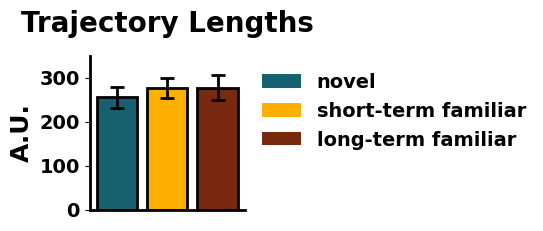

In [24]:
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                  'long-term familiar': hex_2_rgb('#792910')}
hatches = ['','','']  
x = [0.5,1,1.5]
plt.figure(figsize= (2,2))           
plt.bar(x, means, yerr = sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2,
            error_kw={'elinewidth': 2, 'capthick': 2}, 
            width = .4)
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.ylim(0,350)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Trajectory Lengths', fontsize = 20, y = 1.1)
plt.savefig('phase2_trajlen.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()
